<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Gráficas-lineales" data-toc-modified-id="Gráficas-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gráficas lineales</a></span></li><li><span><a href="#Diagramas-de-dispersión-simples" data-toc-modified-id="Diagramas-de-dispersión-simples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Diagramas de dispersión simples</a></span></li><li><span><a href="#Visualización-de-errores" data-toc-modified-id="Visualización-de-errores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualización de errores</a></span><ul class="toc-item"><li><span><a href="#Barras-de-error" data-toc-modified-id="Barras-de-error-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Barras de error</a></span></li><li><span><a href="#Errores-continuos" data-toc-modified-id="Errores-continuos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Errores continuos</a></span></li></ul></li><li><span><a href="#Gráficas-de-densidad-y-curvas-de-nivel" data-toc-modified-id="Gráficas-de-densidad-y-curvas-de-nivel-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gráficas de densidad y curvas de nivel</a></span></li></ul></div>

> **Disclaimer**: Este notebook contiene mis notas sobre Matplotlib, resumiendo básicamente el [capítulo 4](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) de [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) escrito por [Jake VanderPlas](http://vanderplas.com/). Recomiendo leer la fuente original e ir ejecutando todos los ejemplos (___learn by doing!___).

## Intro

[Matplotlib](https://matplotlib.org/) (Math Plot Lib for Python) es un paquete para la construcción de visualizaciones en Python, construida sobre los arrays de NumPy, y diseñada para funcionar sobre todo el stack de SciPy.

Una de las características más importantes de Matplotlib es que funciona en múltiples sistemas operativos y frameworks. Su desventaja reside en su interfaz gráfica, algo anticuada; pero se han desarrollado por encima nuevos paquetes como **Seaborn** que potencian esa parte.

Para poder usar Matplotlib, simplemente tendremos que importar la librería. Usualmente también trabajaremos con el módulo pyplot (proporciona una interfaz con sintaxis parecido al de Matlab), que también importamos por defecto.

In [1]:
import matplotlib as mpl # mpl es el alias usado habitualmente para matplotlib
import matplotlib.pyplot as plt # plt es el alias para pyplot

Podemos especificar el estilo de las gráficas:

In [2]:
plt.style.use('seaborn-whitegrid')

Existen 3 formas de pintar gráficas con Matplotlib:
 * Desde un script: invocando `plt.show()` al final, de forma que se muestren todas las gráficas creadas
 * Desde un terminal de IPython: escribiendo `%matplotlib` en el terminal, todas las gráficas que se creen después se visualizarán automáticamente. Podemos usar `plt.draw()` para refrescarlas.
 * Desde un notebook: escribiendo `%matplotlib notebook` activaremos la inserción de gráficas interactivas; mientras que con `%matplotlib inline` se insertarán imágenes estáticas. 
 Estas imágenes se pueden guardar usando el método `savefig('name')`.
 También las podemos cargar usando la clase Image del módulo IPython.display:

In [3]:
from IPython.display import Image
#Image('file')

Podemos trabajar con la interfaz de pyplot, siguiendo el estilo de Matlab:

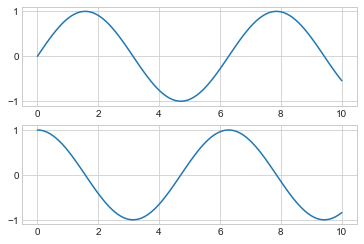

In [4]:
import numpy as np
%matplotlib inline

x = np.linspace(0, 10, 100)

# Creamos una figura
plt.figure()

# Creamos el primer subpanel (de 2) y pintamos la gráfica
plt.subplot(2, 1, 1) # (filas, columnas, nº de subpanel)
plt.plot(x, np.sin(x))

# Creamos el segundo subpanel y pintamos la gráfica
plt.subplot(2, 1, 2) # (filas, columnas, nº de subpanel)
plt.plot(x, np.cos(x)); # el ';' evita que se imprima la salida, que es una línea de texto.

O bien podemos trabajar con la interfaz orientada a objetos:

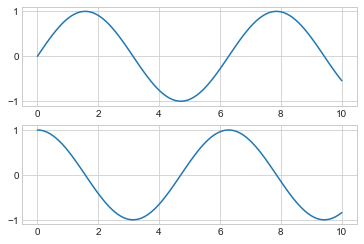

In [5]:
# Creación de la figura y el panel
fig, ax = plt.subplots(2) # ax serña un array de 2 objetos Axes

# Pintamos las gráficas en los subpaneles
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

## Gráficas lineales

Las visualizaciones más sencillas quizá sean las de una función `y = f(x)`

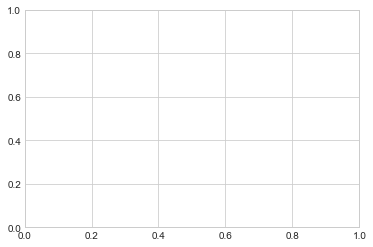

In [6]:
fig = plt.figure() # creación de una figura (esto no pinta nada, sólo crea un contenedor para todo lo demás)
ax = plt.axes() # creación de los ejes (esto pinta el grid)

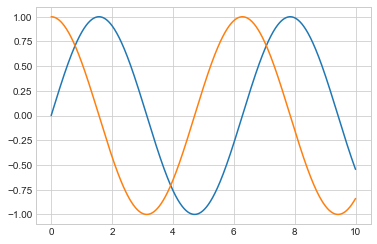

In [7]:
# Ejemplo usando figure y axes
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

Alternativamente podemos usar la interfaz pylab, y que tanto la figura como los ejes se creen de forma transparente:

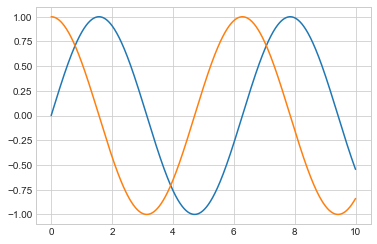

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

Con `plot()` podemos usar varios parámetros:
 * `color`=...
  * 'blue' : nombre
  * 'chartreuse' : nombre HTML
  * 'b' : código rgbcmyk
  * '0.75' : escala de grises, entre 0 y 1
  * '#FF9944' : código hexadecimal RRGGBB, entre 0 y F
  * '(1, 0.7, 0.3)' : tupla R,G,B, entre 0 y 1
 * `linestyle`=
  * '-' | 'solid'
  * '--' | 'dashed'
  * '-' | 'dashdot'
  * '-' | 'dotted'
 * `label`='str' : etiqueta para una función que se mostrará en la leyenda de la gráfica, si se muestra

Ambos se pueden combinar; escribiendo simplemente **'--g'** tendremos dashed green.

Tenemos más métodos disponibles en `pyplot`:
 * `xlim(x1, x2)` : ajusta eje x, pudiendo ser creciente (lim2 > lim1) o decreciente
 * `ylim(y1, y2)` : ajusta eje y, creciente o decreciente.
 * `axis()` : ajusta ambos ejes
  * `axis([x1, x2, y1, y2])` : ajusta ambos ejes a lo indicado
  * `axis('tight')` : ajusta los ejes al contenido
  * `axis('equal')` : ajusta los ejes para que las unidades en x e y tengan el mismo tamaño
 * `title(str)` : establece el título de la gráfica
 * `xlabel(str)` : establece la etiqueta del eje x
 * `ylabel(str)` : establece la etiqueta del eje y
 * `legend()` : muestra la leyenda de la gráfica
 
Cuando usamos la interfaz orientada a objetos, algunos métodos de Axes se llaman igual que los de pyplot, pero otros no. En todo caso se suelen establecer todos usando el método `set()` con todo ello como parámetros:

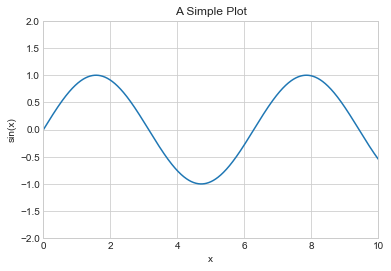

In [ ]:
# Ejemplo
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

## Diagramas de dispersión simples

Otro tipo de gráfica muy usada son los diagramas de dispersión, que viene a ser una versión discreta de la gráfica lineal.

Podemos crearlos usando plot():

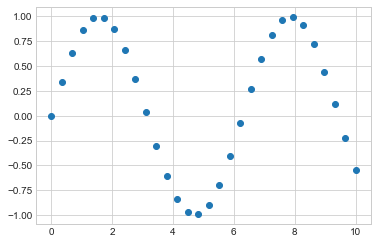

In [ ]:
# Ejemplo
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o'); # el tercer argumento es el símbolo usado para representar los puntos

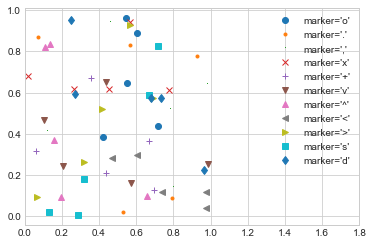

In [ ]:
# Ejemplo 2
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Existen más parámetros para personalizar las gráficas. Lo mejor es echar un vistazo a la documentación de [pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Una segunda forma de crear este tipo de gráficas es usando la función `scatter()` de pyplot, que funciona de forma parecida a plot():

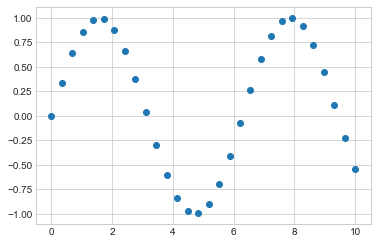

In [ ]:
# Ejemplo
plt.scatter(x, y, marker='o');    

La ventaja con respecto a plot, es que con scatter podemos tratar las propiedades de cada punto de forma individual. Esto nos permite en realidad ver representadas 4 dimensiones de un punto.

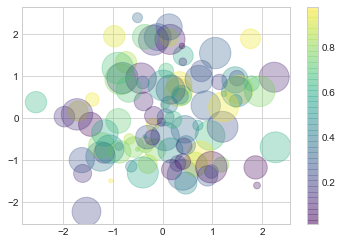

In [ ]:
# Ejemplo con puntos aleatorios de distintos colores y tamaños
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis') # cmap especifica el mala de color; alpha la transparencia
plt.colorbar();  # muestra la escala de colores

La desventaja de usar scatter, es que para datasets grandes es sensiblemente menos eficiente que plot.

## Visualización de errores

### Barras de error

Podemos crear una gráfica de barras de error con una simple llamada:

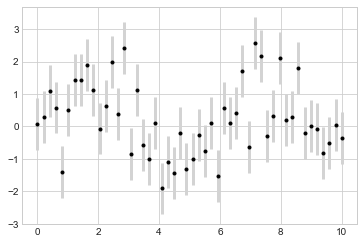

In [ ]:
# Ejemplo
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k',
             ecolor='lightgray', elinewidth=3, capsize=0); # fmt indica el formato (mismo sinaxis que plot)

Para más opciones, lo mejor es consultar la documentación de [pyplot.errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html).

### Errores continuos

Aunque Matplotlib no tiene nada específico para mostrar el error de forma contínua, se puede conseguir combinando plot y `fill`:

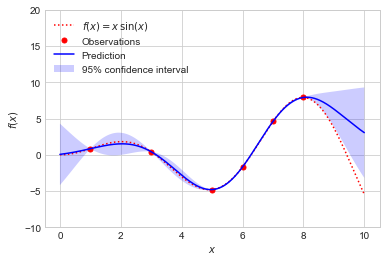

In [ ]:
# Ejemplo (https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html)
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)

def f(x):
    """The function to predict."""
    return x * np.sin(x)

#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.2, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left');

## Gráficas de densidad y curvas de nivel

A veces queremos representar datos con 3 dimensiones en 2, usando curvas de nivel o regiones de color. Matplotlib tiene 3 funciones para realizar este tipo de gráficas:
 * `plt.contour` : para crear curvas de densidad
 * `plt.contourf` : para crear curvas de densidad rellenas
 * `plt.imshow` : para mostrar imágenes

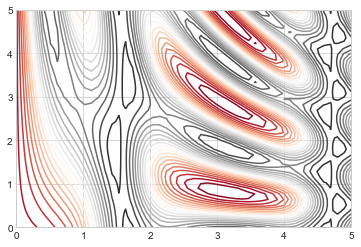

In [ ]:
# Ejemplo
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 20, cmap='RdGy');

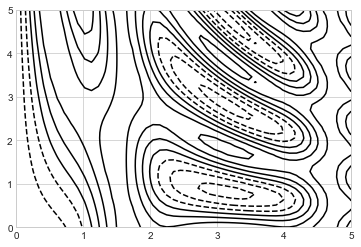

In [ ]:
# Versión en b/n
plt.contour(X, Y, Z, colors='black'); # 

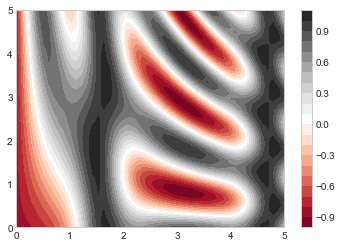

In [ ]:
# Mejora rellenando el espacio entre líneas
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

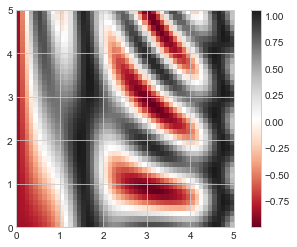

In [ ]:
# Mejora eliminando saltos
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

In [ ]:
# Lo mejor es combinar ambas funciones y usar etiquetas!
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.4)
plt.colorbar();